In [132]:
#load the libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import VotingClassifier,StackingClassifier


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# read the dataset
train = pd.read_csv('train_loan_data.csv')
test = pd.read_csv('test_loan_data.csv')
test_results = pd.read_csv('test_results.csv')

In [4]:
#test_results

In [5]:
train.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-1997,10+ years,Deputy,744.0,740.0,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338.0,93.6,E1,60 months,Debt consolidation,8.0,Source Verified,Charged Off
1,CA,40000.0,Apr-1987,10+ years,Department of Veterans Affairs,724.0,720.0,B,RENT,Individual,...,0.0,debt_consolidation,19944.0,60.3,B1,36 months,Credit Loan,12.0,Verified,Fully Paid
2,FL,60000.0,Aug-2007,10+ years,Marble polishing,679.0,675.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199.0,88.5,B5,36 months,Debt consolidation,16.0,Source Verified,Fully Paid
3,IL,100742.0,Sep-1980,10+ years,printer,664.0,660.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425.0,69.0,B2,36 months,Debt consolidation,19.0,Source Verified,Fully Paid
4,MD,80000.0,Jul-1999,10+ years,Southern Mgmt,669.0,665.0,F,RENT,Individual,...,0.0,debt_consolidation,34370.0,90.0,F5,60 months,Debt Connsolidation,59.0,Verified,Fully Paid


In [6]:
train.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'loan_status'],
      dtype='object')

In [7]:
train.shape, test.shape, test_results.shape

((80000, 28), (20000, 27), (20000, 1))

In [8]:
emp_length_mapping = {
    '10+ years': 10,
    '3 years': 3,
    '< 1 year': 0,
    '1 year': 1,
    '8 years': 8,
    '7 years': 7,
    '4 years': 4,
    '2 years': 2,
    '5 years': 5,
    '6 years': 6,
    '9 years': 9
}

In [9]:
# Replace the string values with numeric values
train['emp_length'] = train['emp_length'].replace(emp_length_mapping)

# Convert the column to float
train['emp_length'] = train['emp_length'].astype(float)

In [10]:
# Replace the string values with numeric values
test['emp_length'] = test['emp_length'].replace(emp_length_mapping)

# Convert the column to float
test['emp_length'] = test['emp_length'].astype(float)

In [11]:
# Check unique values in the 'emp_length' column
unique_emp_length = train['emp_length'].unique()
print(unique_emp_length)


[10. nan  3.  0.  1.  8.  7.  4.  2.  5.  6.  9.]


In [12]:
test['emp_length']

0         1.0
1        10.0
2        10.0
3         9.0
4         NaN
         ... 
19995     4.0
19996     3.0
19997    10.0
19998    10.0
19999     0.0
Name: emp_length, Length: 20000, dtype: float64

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  float64
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  float64
 6   fico_range_low        80000 non-null  float64
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  float64
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

In [14]:
train.describe()

,annual_inc,emp_length,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
count,8.000000e+04,75412.000000,80000.000000,80000.000000,80000.000000,80000.000000,76052.000000,77229.000000,7.605200e+04,80000.000000,80000.000000,79969.000000,8.000000e+04,79947.000000,80000.000000
mean,7.604614e+04,5.965138,699.987975,695.987813,13.232898,14403.867813,3.633790,1.674759,1.415864e+05,11.605675,0.216675,0.137103,1.628934e+04,51.899142,25.036875
std,6.902006e+04,3.685033,31.734840,31.734075,4.771705,8703.826298,2.262505,2.005104,1.593714e+05,5.483362,0.579854,0.383202,2.264915e+04,24.504836,12.009194
min,0.000000e+00,0.000000,664.000000,660.000000,5.310000,750.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000
25%,4.600000e+04,2.000000,674.000000,670.000000,9.750000,7925.000000,2.000000,0.000000,2.964200e+04,8.000000,0.000000,0.000000,5.965750e+03,33.500000,16.000000
50%,6.500000e+04,6.000000,694.000000,690.000000,12.740000,12000.000000,3.000000,1.000000,8.100050e+04,11.000000,0.000000,0.000000,1.111100e+04,52.200000,23.000000
75%,9.000000e+04,10.000000,714.000000,710.000000,15.990000,20000.000000,5.000000,3.000000,2.110272e+05,14.000000,0.000000,0.000000,1.963500e+04,70.800000,32.000000
max,7.141778e+06,10.000000,850.000000,845.000000,30.990000,40000.000000,32.000000,32.000000,5.172185e+06,80.000000,24.000000,7.000000,1.023940e+06,152.600000,162.000000


In [15]:
#check for duplicates
train.duplicated().sum(),test.duplicated().sum()

#no duplicates

(0, 0)

In [16]:
train.nunique()

addr_state                 51
annual_inc               7536
earliest_cr_line          640
emp_length                 11
emp_title               36661
fico_range_high            38
fico_range_low             38
grade                       7
home_ownership              6
application_type            2
initial_list_status         2
int_rate                  549
loan_amnt                1373
num_actv_bc_tl             28
mort_acc                   28
tot_cur_bal             65410
open_acc                   56
pub_rec                    15
pub_rec_bankruptcies        8
purpose                    14
revol_bal               32971
revol_util               1080
sub_grade                  35
term                        2
title                    5349
total_acc                 107
verification_status         3
loan_status                 2
dtype: int64

In [17]:
#from sklearn.preprocessing import FunctionTransformer

# Define the custom function to extract the last 4 characters
#def extract_last_4_chars(series):
    #return series.str[-4:]

# Use FunctionTransformer in your pipeline
#('last_4_chars', FunctionTransformer(func=extract_last_4_chars, validate=False), ['earliest_cr_line'])

In [18]:
#preprocessor_0 = ColumnTransformer(
   # transformers=[
     #   FunctionTransformer(lambda x: x.str[-4:], validate=False), ['earliest_cr_line']])

In [19]:
#preprocessor_0

In [20]:
#preprocessor_1 = ColumnTransformer(transformers=[
    #('emp_length', FunctionTransformer(lambda x: x.replace({'10+ years': '10 years', '< 1 year': '0 years'}), validate=False).apply(lambda y: int(y.split(' ')[0]) if pd.notna(y) else y), ['emp_length'])
#])

In [21]:
#preprocessor_1 = 

#/#*ColumnTransformer(
   # transformers=[
        #('last_4_chars', FunctionTransformer(func=extract_last_4_chars, validate=False), ['earliest_cr_line']),
     #   ('emp_length_rename', FunctionTransformer(lambda x: x.replace(to_replace='10+ years', value='10 years').replace(to_replace='< 1 year', value='0 years'), validate=False), ['emp_length']),
    #    ('emp_length', FunctionTransformer(lambda x: x.apply(lambda y: int(y.split(' ')[0]) if pd.notna(y) else y), validate=False), ['emp_length'])
  #  ]
#)*/

In [22]:
 #('date_year', FunctionTransformer(lambda x: pd.to_datetime(x, format='%b-%Y').dt.year, validate=False), ['earliest_cr_line']),

In [23]:
#preprocessor_0

In [24]:
cat_cols = train.select_dtypes(include=object).columns
num_cols = train.drop(columns='loan_status').select_dtypes(include=np.number).columns

In [25]:
'''cat_cols = train.select_dtypes(include=object).columns
num_cols = train.drop(columns='loan_status').select_dtypes(include=np.number).columns'''

"cat_cols = train.select_dtypes(include=object).columns\nnum_cols = train.drop(columns='loan_status').select_dtypes(include=np.number).columns"

In [26]:
cat_cols

Index(['addr_state', 'earliest_cr_line', 'emp_title', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term', 'title', 'verification_status', 'loan_status'],
      dtype='object')

In [27]:
num_cols

Index(['annual_inc', 'emp_length', 'fico_range_high', 'fico_range_low',
       'int_rate', 'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal',
       'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal',
       'revol_util', 'total_acc'],
      dtype='object')

In [28]:
cat_cols_v1= ['addr_state', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term',  'verification_status', 'loan_status']

In [29]:
for column in cat_cols_v1:
    unique_values = train[column].nunique()
    #unique_values_counts = train[column].value_counts()
    print(f"Column: {column} \n{unique_values}")
    print("----------------------------------------------------------")
    #print("----------------------------------------------------------")

Column: addr_state 
51
----------------------------------------------------------
Column: grade 
7
----------------------------------------------------------
Column: home_ownership 
6
----------------------------------------------------------
Column: application_type 
2
----------------------------------------------------------
Column: initial_list_status 
2
----------------------------------------------------------
Column: purpose 
14
----------------------------------------------------------
Column: sub_grade 
35
----------------------------------------------------------
Column: term 
2
----------------------------------------------------------
Column: verification_status 
3
----------------------------------------------------------
Column: loan_status 
2
----------------------------------------------------------


In [30]:
for column in cat_cols_v1:
    unique_values = train[column].unique()
    unique_values_counts = train[column].value_counts()
    print(f"Column: {column} \n{unique_values_counts}")
    print("----------------------------------------------------------")
    #print("----------------------------------------------------------")

Column: addr_state 
CA    11744
TX     6493
NY     6461
FL     5618
IL     3098
NJ     2853
PA     2676
OH     2575
GA     2530
NC     2291
VA     2249
MI     2091
AZ     1993
MA     1862
MD     1802
CO     1790
WA     1736
MN     1414
IN     1329
MO     1298
NV     1224
TN     1207
CT     1143
WI     1043
OR     1025
SC     1007
AL      986
LA      928
KY      836
OK      725
KS      649
AR      590
UT      554
NM      440
HI      404
NH      373
MS      373
RI      356
WV      268
NE      240
MT      229
DE      219
AK      215
DC      201
SD      192
WY      187
VT      181
ME      110
ID      106
ND       85
IA        1
Name: addr_state, dtype: int64
----------------------------------------------------------
Column: grade 
B    23502
C    22525
A    13996
D    11936
E     5620
F     1885
G      536
Name: grade, dtype: int64
----------------------------------------------------------
Column: home_ownership 
MORTGAGE    39628
RENT        31688
OWN          8654
ANY            19
OTHER

In [31]:
#check for nulls
train.isnull().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4588
emp_title               5018
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
title                    970
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

EDA

<AxesSubplot:ylabel='loan_status'>

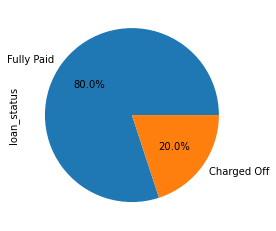

In [32]:
train['loan_status'].value_counts().plot.pie(autopct='%1.1f%%')

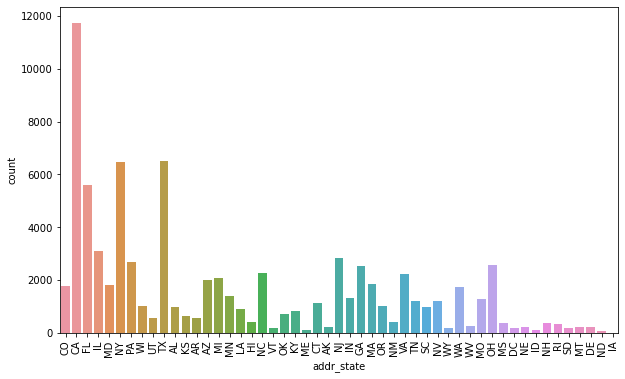

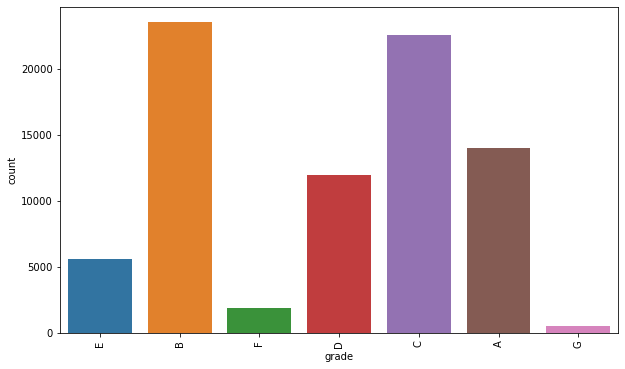

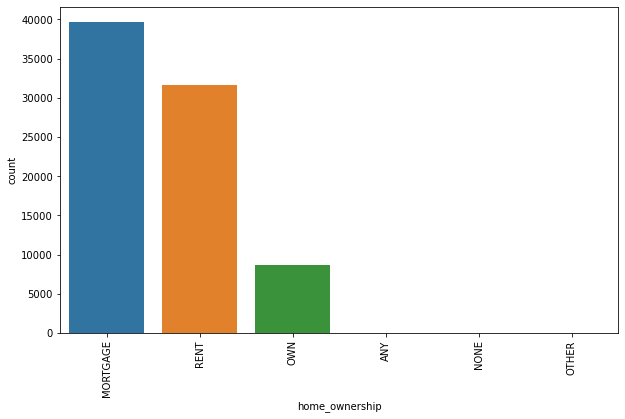

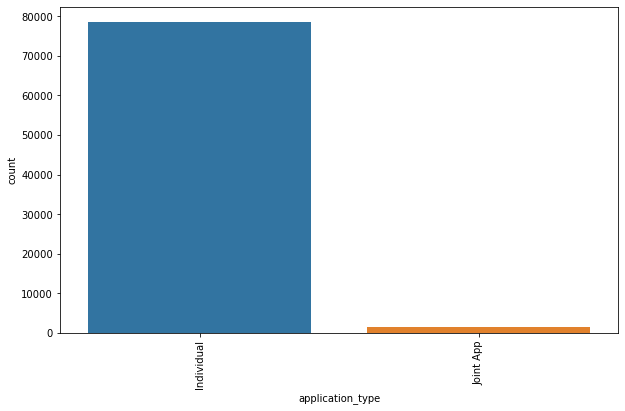

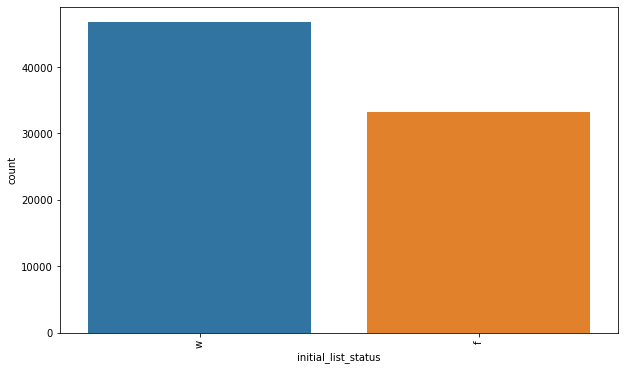

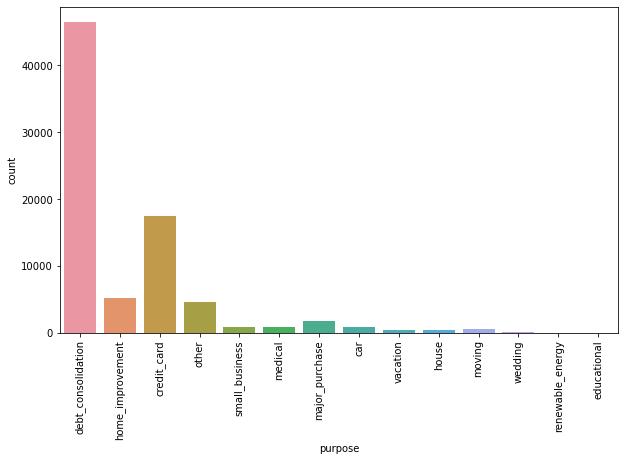

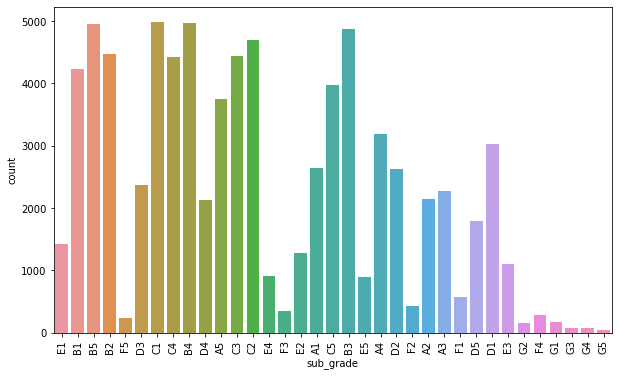

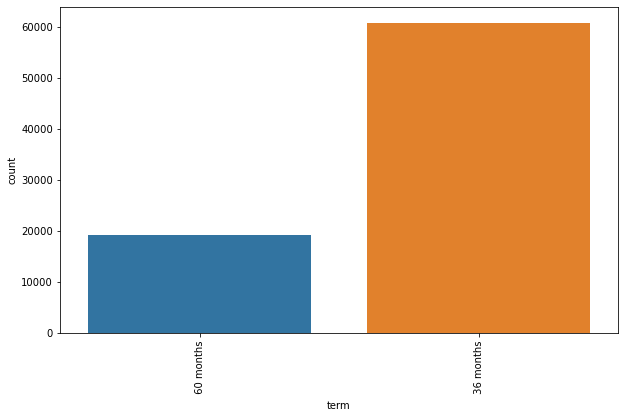

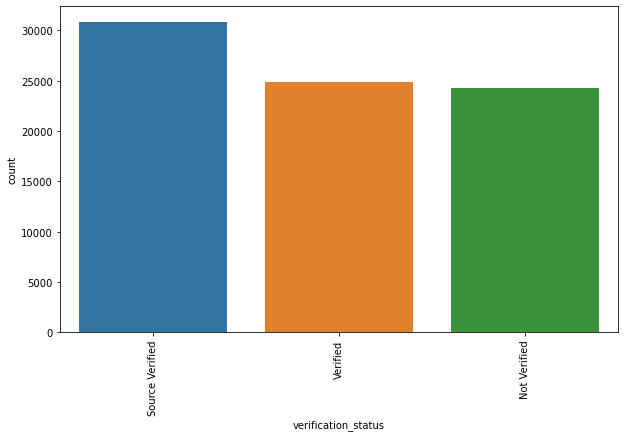

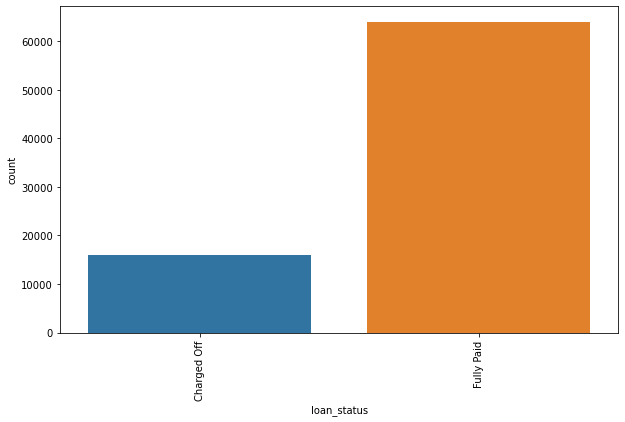

In [33]:
for column in cat_cols_v1:
    plt.figure(figsize=(10, 6))
    x = sns.countplot(x=train[column])
    plt.setp(x.get_xticklabels(),rotation = 90)
    plt.show()

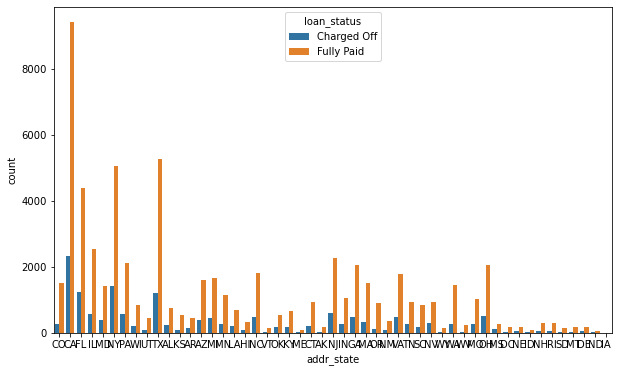

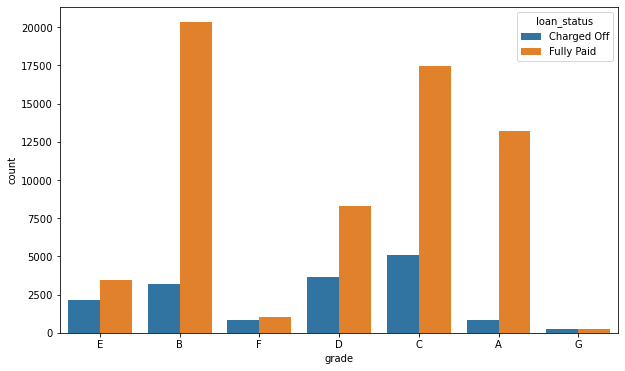

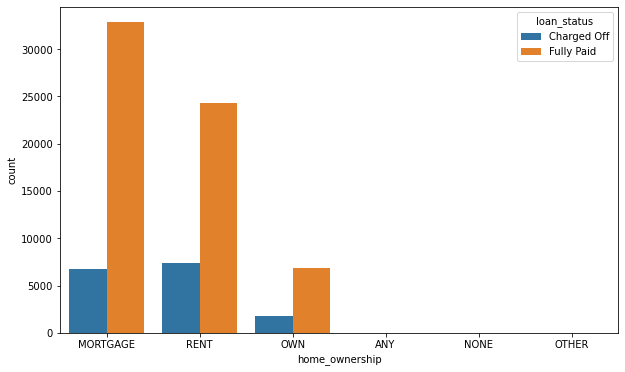

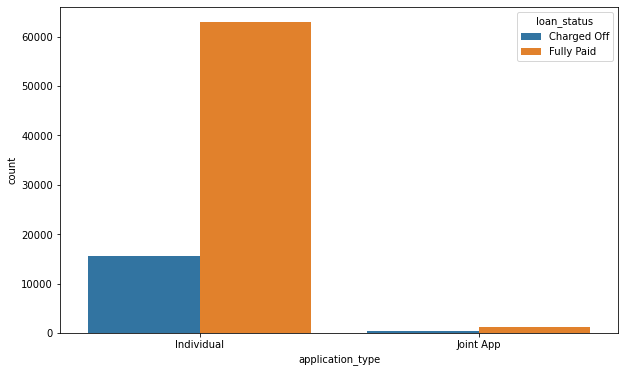

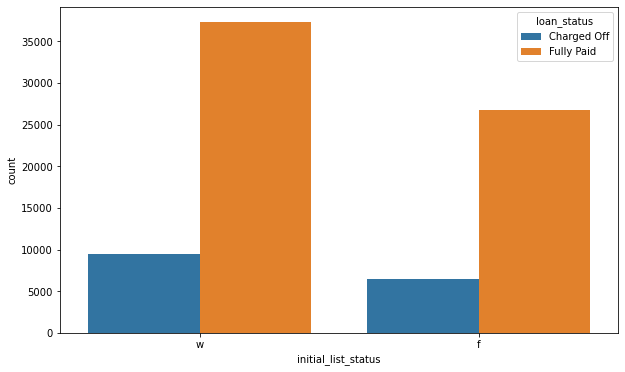

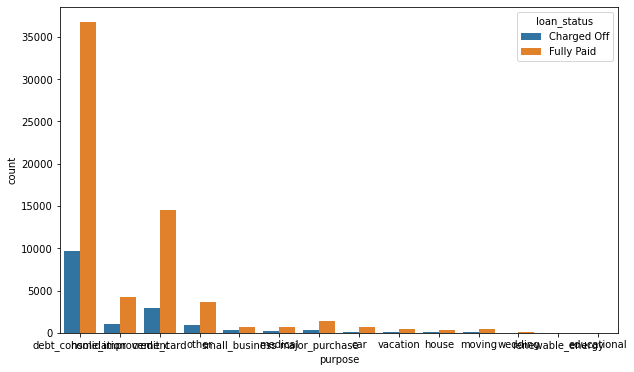

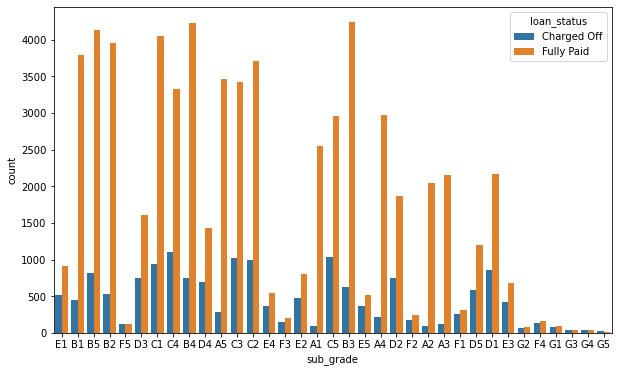

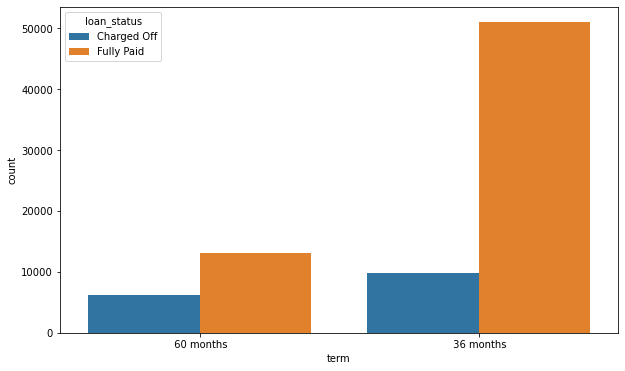

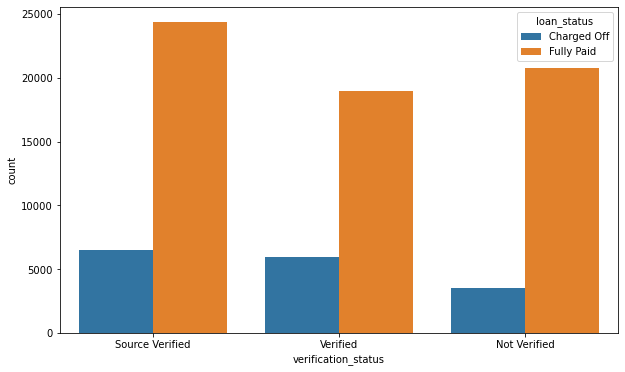

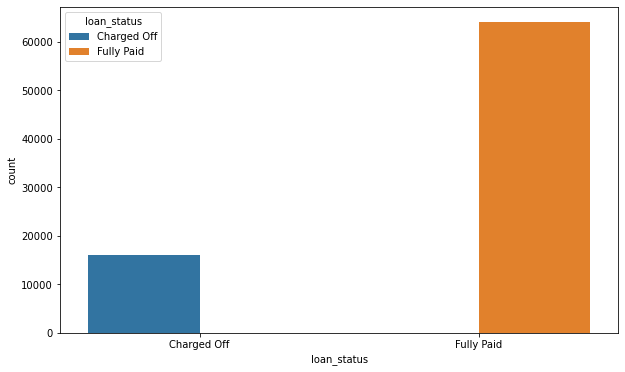

In [34]:
for col in cat_cols_v1:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train, x=col, hue='loan_status');
    plt.setp(x.get_xticklabels(),rotation = 90)
    plt.show()

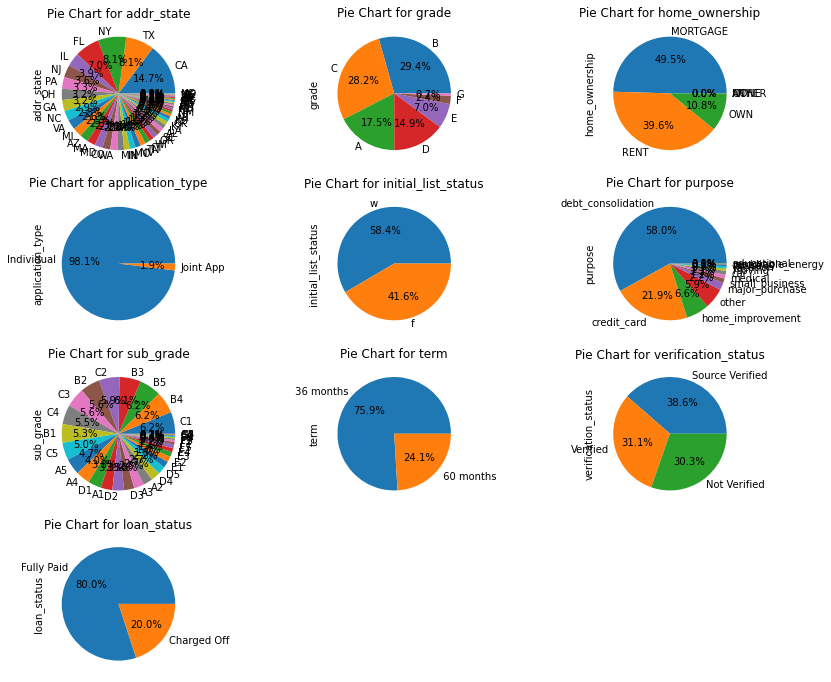

In [36]:
nrows=4
ncols=3
itr=1

plt.figure(figsize=(14,12))

for i in cat_cols_v1:
    plt.subplot(nrows,ncols,itr)
    a= train[i].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'Pie Chart for {i}')
    itr = itr+1
plt.show()

<AxesSubplot:xlabel='grade', ylabel='count'>

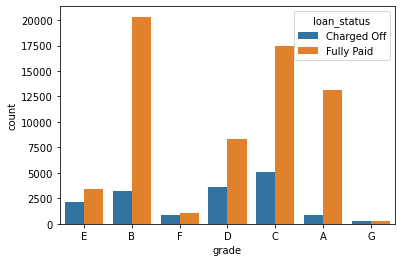

In [37]:
# grade vs loan status
sns.countplot(data=train, x='grade', hue='loan_status')

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

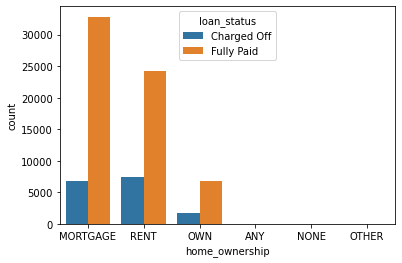

In [38]:
# grade vs loan status
sns.countplot(data=train, x='home_ownership', hue='loan_status')

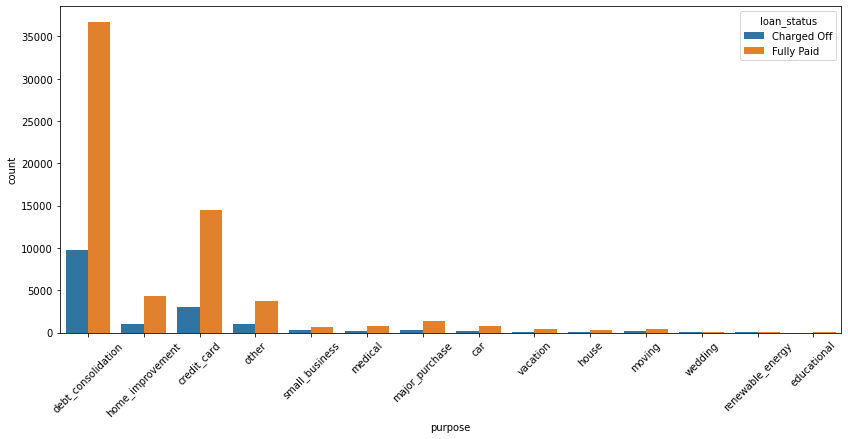

In [39]:
# grade vs loan status
plt.figure(figsize=(14, 6))
ax = sns.countplot(data=train, x='purpose', hue='loan_status')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
#sns.countplot(data=train, x='purpose', hue='loan_status')
plt.show()

<AxesSubplot:xlabel='emp_length', ylabel='count'>

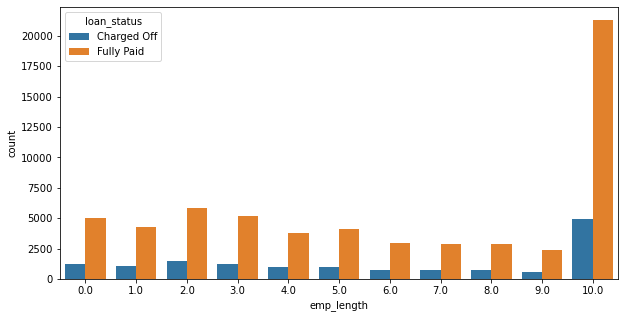

In [40]:
plt.figure(figsize=(10, 5))
sns.countplot(data=train, x='emp_length',  hue='loan_status')

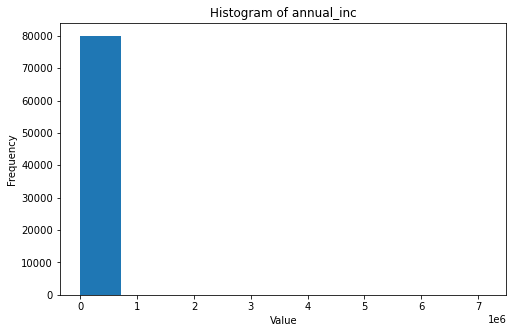

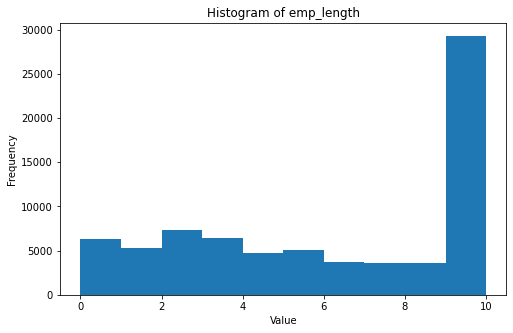

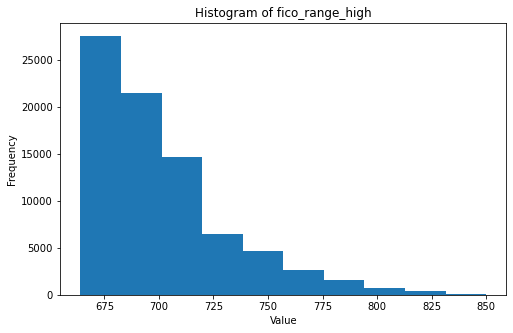

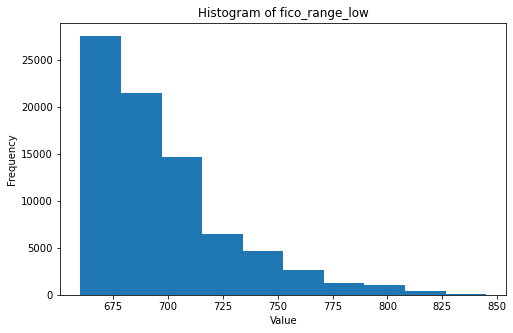

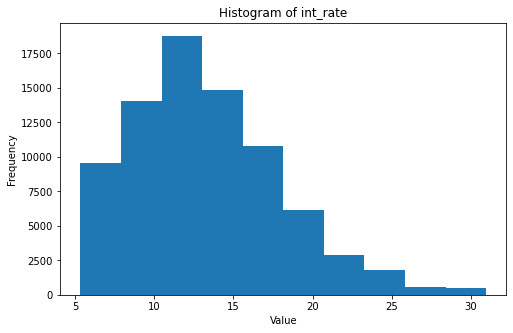

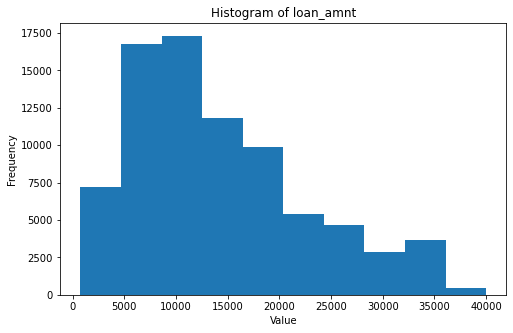

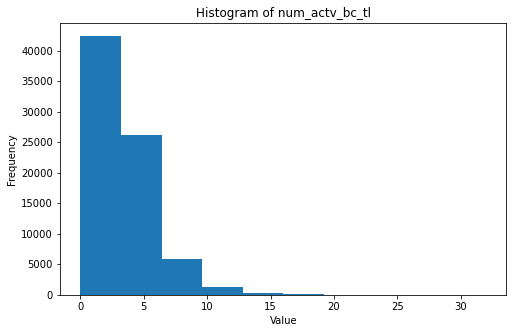

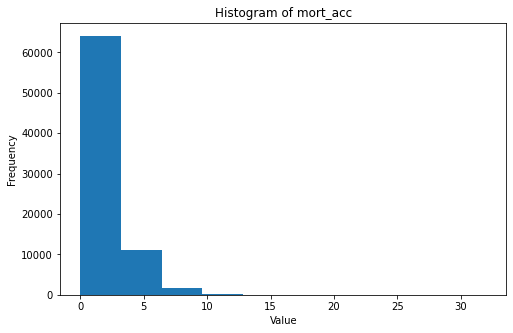

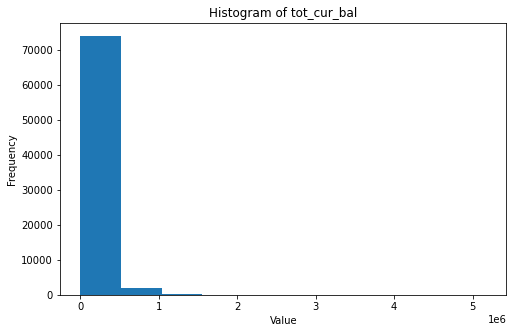

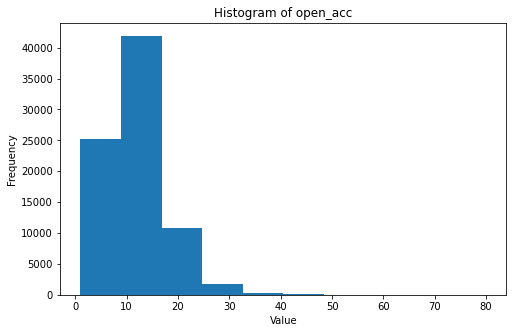

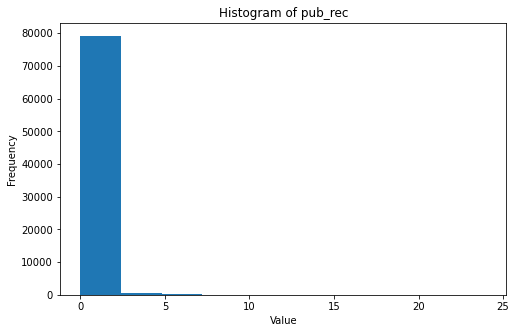

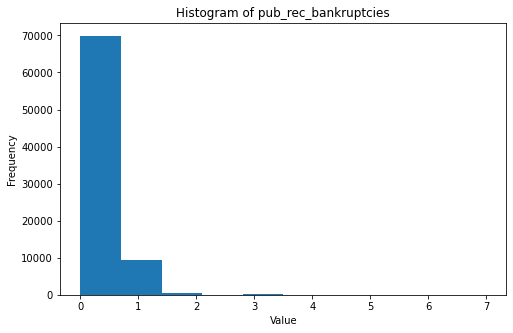

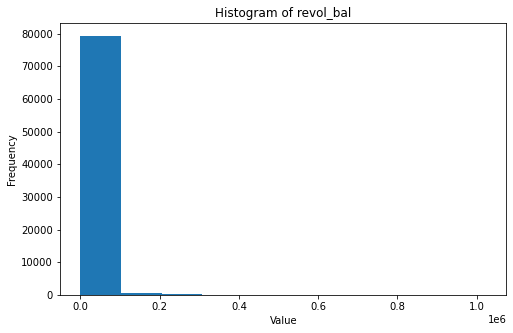

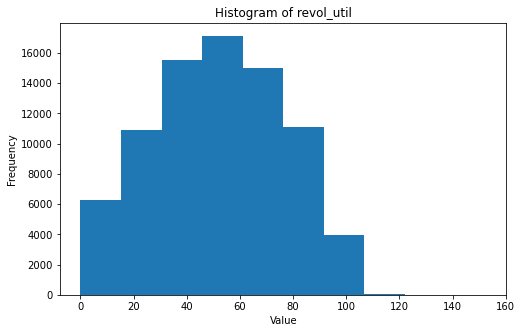

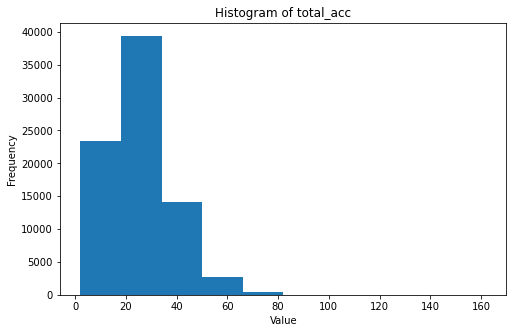

In [41]:
# Histogram to visualize the distribution
for column in num_cols:
    plt.figure(figsize=(8, 5))
    plt.hist(train[column], bins=10)
    plt.title(f"Histogram of {column}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

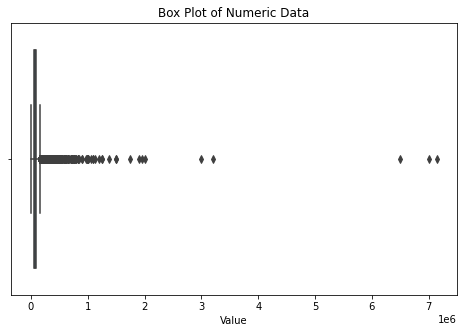

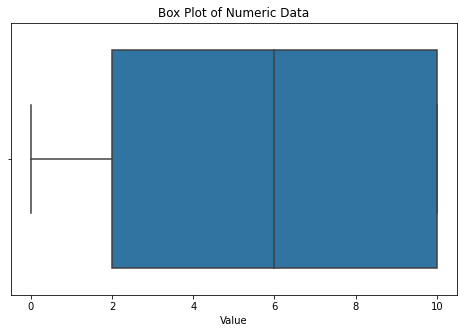

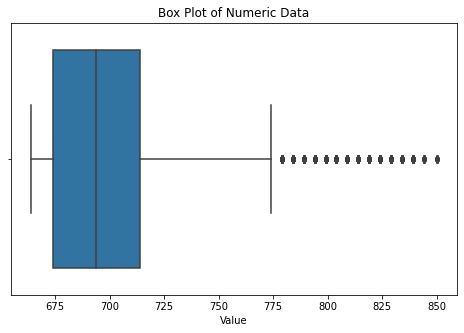

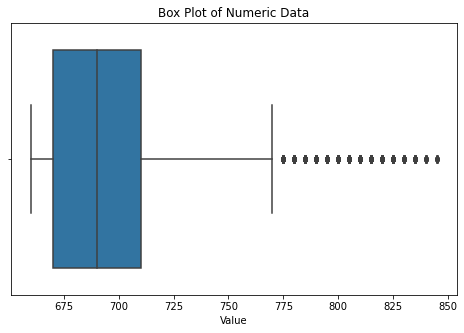

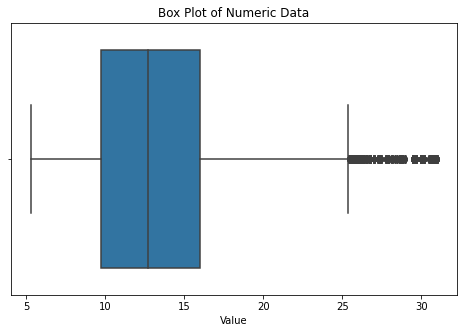

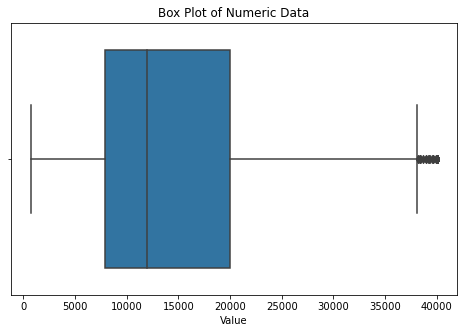

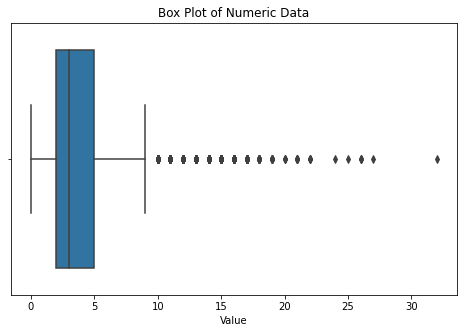

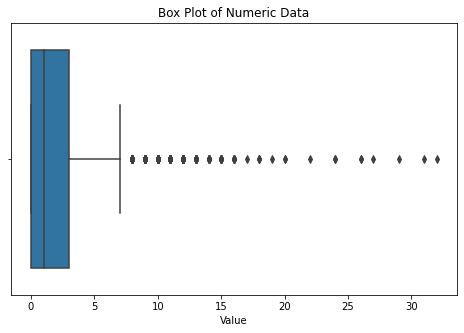

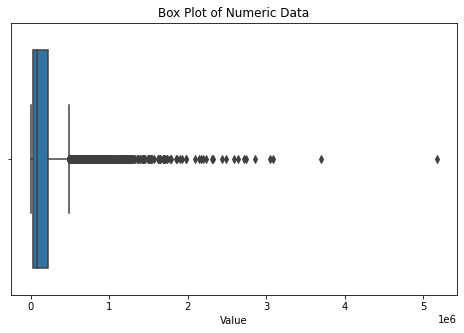

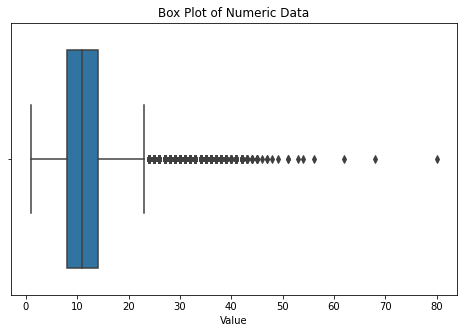

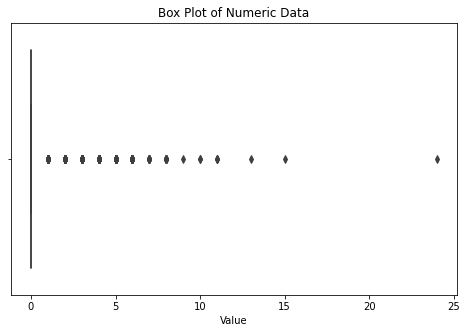

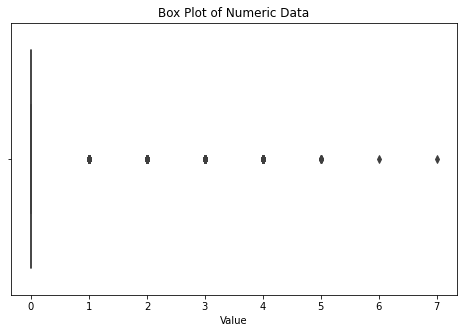

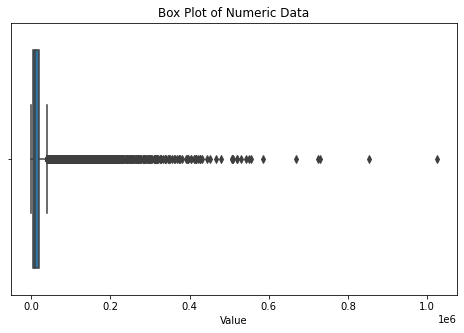

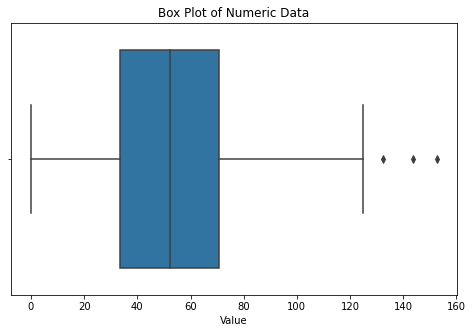

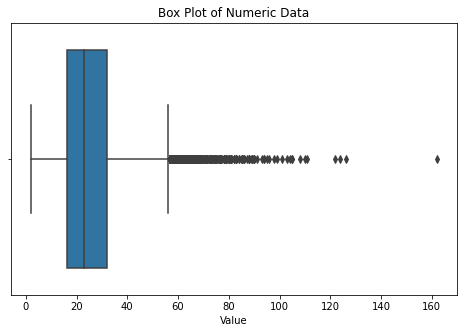

In [42]:
# Box plot to identify outliers
for column in num_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x= train[column])
    plt.title("Box Plot of Numeric Data")
    plt.xlabel("Value")
    plt.show()

In [43]:
display(pd.crosstab(train['grade'],train['loan_status']))

loan_status,Charged Off,Fully Paid
grade,,
A,819,13177
B,3174,20328
C,5077,17448
D,3648,8288
E,2156,3464
F,839,1046
G,257,279


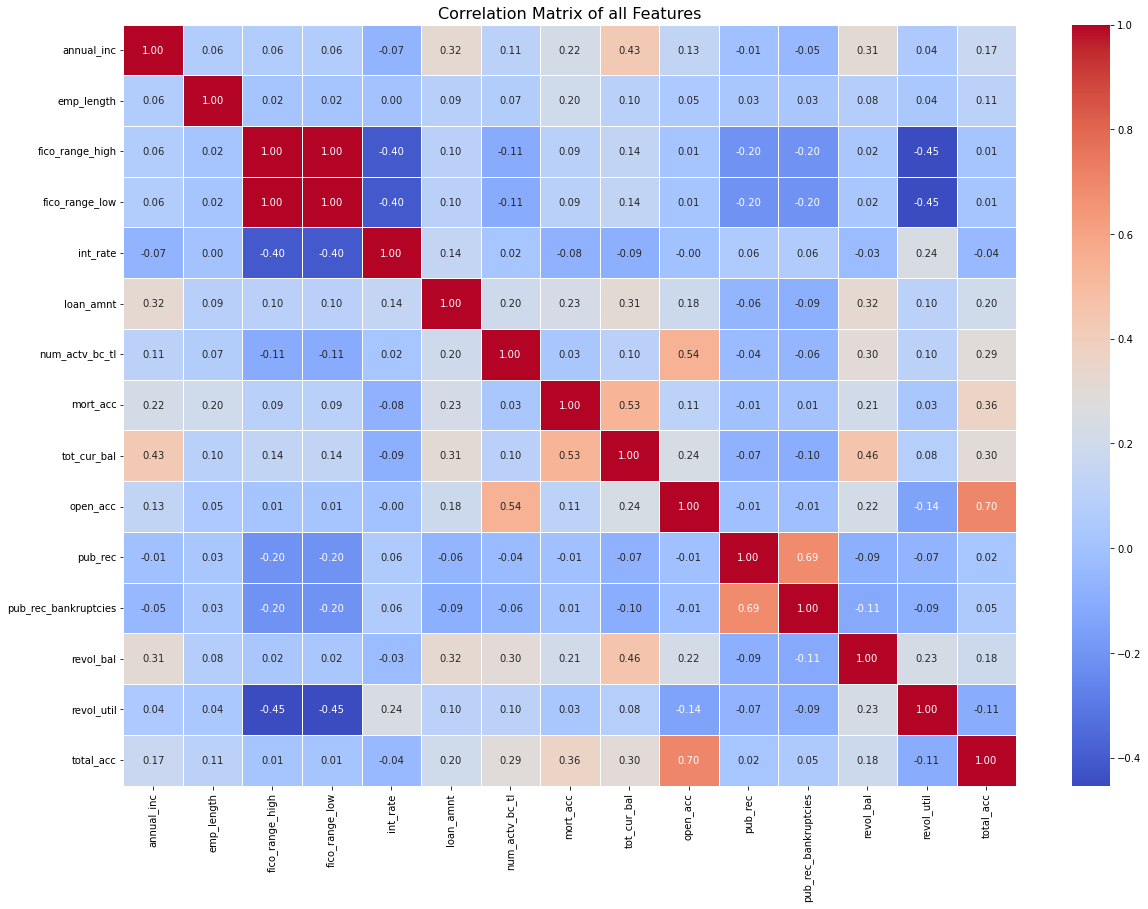

In [44]:
# Calculate the correlation matrix for features
corr_mat = train[train.columns].corr()

# Set up the figure for the heatmap with a specific size
fig = plt.figure(figsize=(20, 14))
plt.title('Correlation Matrix of all Features', size=16)


# Create a heatmap using Seaborn
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the heatmap
plt.show()

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

In [46]:
class CustomTranformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X,y = None):
        return self
    def transform(self, X, y = None):
        return X

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin

class SplitColumnTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column_name, delimiter='-'):
        self.column_name = column_name
        self.delimiter = delimiter

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[['Month', 'Year']] = X_copy[self.column_name].str.split(self.delimiter, expand=True)
        X_copy.drop(columns=[self.column_name], inplace=True)
        return X_copy

In [48]:
split_transformer = SplitColumnTransformer(column_name='earliest_cr_line', delimiter='-')

In [49]:
#transformed_data = split_transformer.transform(train)

In [50]:
#transformed_data.info()

In [51]:
'''from sklearn.base import BaseEstimator, TransformerMixin

class RenameValuesTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column_name, old_to_new_mapping):
        self.column_name = column_name
        self.old_to_new_mapping = old_to_new_mapping

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.column_name] = X_copy[self.column_name].replace(self.old_to_new_mapping)
        X_copy[self.column_name] = X_copy[self.column_name].str.extract('(\d+)').astype(float)
        return X_copy'''

"from sklearn.base import BaseEstimator, TransformerMixin\n\nclass RenameValuesTransformer(BaseEstimator, TransformerMixin):\n    def __init__(self, column_name, old_to_new_mapping):\n        self.column_name = column_name\n        self.old_to_new_mapping = old_to_new_mapping\n\n    def fit(self, X, y=None):\n        return self\n\n    def transform(self, X):\n        X_copy = X.copy()\n        X_copy[self.column_name] = X_copy[self.column_name].replace(self.old_to_new_mapping)\n        X_copy[self.column_name] = X_copy[self.column_name].str.extract('(\\d+)').astype(float)\n        return X_copy"

In [52]:
#rename_transformer = RenameValuesTransformer(column_name='emp_length', old_to_new_mapping={'10+ years': '10 years', '< 1 year': '0 years'})


In [53]:
#rename_transformer

In [54]:
#transformed_data1 = rename_transformer.transform(train)

In [55]:
#transformed_data1['emp_length'].unique()

In [56]:
#check for nulls
train.isnull().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4588
emp_title               5018
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
title                    970
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

In [57]:
'''custom_pipleline = Pipeline([
    ('Custom_category_convert_from_numerical_data',CustomTranformer()),
])'''

"custom_pipleline = Pipeline([\n    ('Custom_category_convert_from_numerical_data',CustomTranformer()),\n])"

In [58]:
#selected_columns = train[['num_actv_bc_tl', 'mort_acc', 'open_acc']]
#print(selected_columns)

In [59]:
'''selected_columns = ['num_actv_bc_tl', 'mort_acc', 'open_acc']
rows_with_null = train[train[selected_columns].isnull().any(axis=1)]
selected_data = rows_with_null[selected_columns]
print(selected_data)'''

"selected_columns = ['num_actv_bc_tl', 'mort_acc', 'open_acc']\nrows_with_null = train[train[selected_columns].isnull().any(axis=1)]\nselected_data = rows_with_null[selected_columns]\nprint(selected_data)"

In [60]:
#train['mort_acc'].value_counts()

In [61]:
#train['num_actv_bc_tl'].value_counts()

In [62]:
#fill null values of columns 'num_actv_bc_tl', 'mort_acc' with mode

class NumactvbctlMortAccTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy['num_actv_bc_tl'] = X_copy['num_actv_bc_tl'].fillna(X_copy['num_actv_bc_tl'].mode()[0])
        X_copy['mort_acc'] = X_copy['mort_acc'].fillna(X_copy['mort_acc'].mode()[0])
        return X_copy

In [63]:
# Create an instance of the transformer
transformer = NumactvbctlMortAccTransformer()

# Apply the transformer to your dataset
transformed_data = transformer.transform(train)  # Replace your_dataset with your dataset variable

# Check if the specified columns have been filled with the mode values
print("Original dataset:")
print(train[['num_actv_bc_tl', 'mort_acc']].isnull().sum())

print("Transformed dataset:")
print(transformed_data[['num_actv_bc_tl', 'mort_acc']].isnull().sum())

Original dataset:
num_actv_bc_tl    3948
mort_acc          2771
dtype: int64
Transformed dataset:
num_actv_bc_tl    0
mort_acc          0
dtype: int64


In [64]:
numactvbctl_mort_acc = NumactvbctlMortAccTransformer()

In [65]:
num_cols

Index(['annual_inc', 'emp_length', 'fico_range_high', 'fico_range_low',
       'int_rate', 'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal',
       'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal',
       'revol_util', 'total_acc'],
      dtype='object')

In [66]:
'''num_cols = ['annual_inc', 'emp_length', 'fico_range_high', 'fico_range_low',
       'int_rate', 'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal',
       'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal',
       'revol_util', 'total_acc']'''

"num_cols = ['annual_inc', 'emp_length', 'fico_range_high', 'fico_range_low',\n       'int_rate', 'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal',\n       'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal',\n       'revol_util', 'total_acc']"

In [68]:
#pipeline for imputing and scaling
num_encode = Pipeline(steps=[
    #('emp_length', custom_transformer_v2),
    ('numactvbctl_mort_acc', numactvbctl_mort_acc),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


In [69]:
# Apply the 'num_encode' pipeline to the sample dataset
transformed_data = num_encode.fit_transform(train[num_cols])

# Convert the transformed_data array back to a DataFrame for inspection
transformed_df = pd.DataFrame(transformed_data, columns=num_cols)

# Inspect the results
print(transformed_df.head())

   annual_inc  emp_length  fico_range_high  fico_range_low  int_rate  \
0    0.129729    1.127194         1.386876        1.386915  1.206516   
1   -0.522259    1.127194         0.756650        0.756674 -0.643987   
2   -0.232487    1.127194        -0.661358       -0.661369 -0.369451   
3    0.357809    1.127194        -1.134028       -1.134050 -0.853557   
4    0.057286    1.127194        -0.976472       -0.976490  2.220835   

   loan_amnt  num_actv_bc_tl  mort_acc  tot_cur_bal  open_acc   pub_rec  \
0   0.421786       -1.177488 -0.309346     1.159940 -0.839942 -0.373674   
1  -0.643844        0.179840 -0.810921    -0.760879 -1.204684 -0.373674   
2   0.413169        0.179840  0.192229    -0.740006 -0.839942 -0.373674   
3   0.642955        0.179840 -0.309346    -0.422887  0.071913 -0.373674   
4   2.366346        4.704268  2.700103    -0.474316  2.077995 -0.373674   

   pub_rec_bankruptcies  revol_bal  revol_util  total_acc  
0             -0.357707  -0.483524    1.702306  -1.41866

In [70]:
#x=ColumnTransformer(transformers=[("pipe",num_encode,number)])

In [71]:
#t1=pd.DataFrame(t.fit_transform(train),columns=number)

In [72]:
#x1

In [73]:
'''categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill null values with mode
])'''

"categorical_transformer = Pipeline(steps=[\n    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill null values with mode\n])"

In [74]:
custom_transformer_v1 = Pipeline(steps=[
    ('split_column', SplitColumnTransformer(column_name='earliest_cr_line', delimiter='-'))  # Split column
    #('rename_values', RenameValuesTransformer(column_name='emp_length', old_to_new_mapping={'10+ years': '10 years', '< 1 year': '0 years'}))  # Rename values
    #('emp_length_transformer', PreprocessEmpLengthTransformer())  # Preprocess 'emp_length'
])

In [75]:
'''custom_transformer_v2 = Pipeline(steps=[
    ('rename_values', RenameValuesTransformer(column_name='emp_length', old_to_new_mapping={'10+ years': '10 years', '< 1 year': '0 years'}))  # Rename values
    
])'''

"custom_transformer_v2 = Pipeline(steps=[\n    ('rename_values', RenameValuesTransformer(column_name='emp_length', old_to_new_mapping={'10+ years': '10 years', '< 1 year': '0 years'}))  # Rename values\n    \n])"

In [76]:
catc = ['earliest_cr_line','addr_state',
 'grade',
 'home_ownership',
 'application_type',
 'initial_list_status',
 'purpose',
 'sub_grade',
 'term',
 'verification_status']

In [77]:
#'earliest_cr_line',

In [78]:
cat_cols_v1

['addr_state',
 'grade',
 'home_ownership',
 'application_type',
 'initial_list_status',
 'purpose',
 'sub_grade',
 'term',
 'verification_status',
 'loan_status']

In [79]:
cat_encode = Pipeline(steps=[
    #('pre', CustomTransformer()),
    ('earliest_cr_line', custom_transformer_v1),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first',sparse=False, handle_unknown='error'))
])

In [80]:
y=ColumnTransformer(transformers=[("cat",cat_encode,catc)])

In [81]:
transformed_data = y.fit_transform(train)

In [82]:
print("Transformed data shape:", transformed_data.shape)

Transformed data shape: (80000, 185)


In [83]:
transformed_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [85]:
'''transformed_data = cat_encode.fit_transform(train)

import pandas as pd
transformed_df = pd.DataFrame(transformed_data)


print(transformed_df.head())'''

'transformed_data = cat_encode.fit_transform(train)\n\nimport pandas as pd\ntransformed_df = pd.DataFrame(transformed_data)\n\n\nprint(transformed_df.head())'

In [86]:
# Combine numerical and categorical pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_encode, num_cols),
        ('cat', cat_encode, catc)
    ]
    #remainder='passthrough'  
)

In [87]:
# Create a final pipeline by wrapping the preprocessor with a FeatureUnion
final_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

In [88]:
preprocessed_data = ColumnTransformer(transformers=[("pre",preprocessor,train)])

In [89]:
preprocessor.fit_transform(train)

array([[ 0.12972915,  1.12719369,  1.38687637, ...,  0.        ,
         0.        ,  0.        ],
       [-0.52225934,  1.12719369,  0.75665026, ...,  0.        ,
         0.        ,  0.        ],
       [-0.23248668,  1.12719369, -0.66135849, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.20217231, -1.66782768,  0.75665026, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.26012684, -0.82932127, -0.97647155, ...,  0.        ,
         0.        ,  0.        ],
       [14.83569161, -1.10882341, -1.13402807, ...,  0.        ,
         0.        ,  0.        ]])

In [90]:
print(preprocessed_data)

ColumnTransformer(transformers=[('pre',
                                 ColumnTransformer(transformers=[('num',
                                                                  Pipeline(steps=[('numactvbctl_mort_acc',
                                                                                   NumactvbctlMortAccTransformer()),
                                                                                  ('imputer',
                                                                                   SimpleImputer(strategy='median')),
                                                                                  ('scaler',
                                                                                   StandardScaler())]),
                                                                  Index(['annual_inc', 'emp_length', 'fico_range_high', 'fico_range_low',
       'int_rate', 'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_...
3           Debt consolidation       19.0    

In [91]:
t1=ColumnTransformer(transformers=[("final",final_pipeline,train.columns)])

In [92]:
transformed_data1 = preprocessor.fit_transform(train)

In [93]:
X = train.drop(columns='loan_status')
y = train[['loan_status']]

In [96]:
train_X,val_X,train_y,val_y = train_test_split(X,y,test_size=0.2,random_state=1)
train_X.shape,val_X.shape,train_y.shape,val_y.shape

((64000, 27), (16000, 27), (64000, 1), (16000, 1))

In [97]:
pipe_logistic=Pipeline(steps=[
    ("fp",final_pipeline),
    ("LR",LogisticRegression())
])

In [101]:
pipe_logistic.fit(X,y)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('fp',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('numactvbctl_mort_acc',
                                                                                    NumactvbctlMortAccTransformer()),
                                                                                   ('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   Index(['annual_inc', 'emp_length', 'fico_range_high', 'fico_range_low',
       'int_rate', 'loan_amnt', 'num_actv_bc_tl', '...
                    

In [102]:
test_predict = pipe_logistic.predict(test)

In [103]:
test_predict

array(['Fully Paid', 'Fully Paid', 'Fully Paid', ..., 'Fully Paid',
       'Fully Paid', 'Fully Paid'], dtype=object)

In [104]:
test_results

,loan_status
0,Fully Paid
1,Fully Paid
2,Fully Paid
3,Charged Off
4,Fully Paid
...,...
19995,Fully Paid
19996,Fully Paid
19997,Fully Paid
19998,Fully Paid


In [105]:
test_pred_result= pd.DataFrame(test_predict)
test_pred_result

,0
0,Fully Paid
1,Fully Paid
2,Fully Paid
3,Fully Paid
4,Fully Paid
...,...
19995,Fully Paid
19996,Fully Paid
19997,Fully Paid
19998,Fully Paid


In [106]:
test_results.value_counts()

loan_status
Fully Paid     16007
Charged Off     3993
dtype: int64

In [107]:
test_pred_result[0].value_counts()

Fully Paid     19596
Charged Off      404
Name: 0, dtype: int64

In [108]:
confusion_matrix(test_results,test_pred_result)

array([[  230,  3763],
       [  174, 15833]], dtype=int64)

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import VotingClassifier,StackingClassifier


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [110]:
pipe_lr = Pipeline([
                  ("fp",final_pipeline),
                  ('lr',LogisticRegression())
])


pipe_dt = Pipeline([
                  ("fp",final_pipeline),
                  ('dt',DecisionTreeClassifier())
])

pipe_knn = Pipeline([
                  ("fp",final_pipeline),
                  ('knn',KNeighborsClassifier())
])

pipe_rf = Pipeline([
                  ("fp",final_pipeline),
                  ('rf',RandomForestClassifier())
])

models = [pipe_lr,pipe_dt,pipe_knn,pipe_rf]

In [111]:
models

[Pipeline(steps=[('fp',
                  Pipeline(steps=[('preprocessor',
                                   ColumnTransformer(transformers=[('num',
                                                                    Pipeline(steps=[('numactvbctl_mort_acc',
                                                                                     NumactvbctlMortAccTransformer()),
                                                                                    ('imputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('scaler',
                                                                                     StandardScaler())]),
                                                                    Index(['annual_inc', 'emp_length', 'fico_range_high', 'fico_range_low',
        'int_rate', 'loan_amnt', 'num_actv_bc_tl', '...
         

In [112]:
#DT
pipe_dt.fit(X,y)
test_predict = pipe_dt.predict(test)
test_pred_result= pd.DataFrame(test_predict)
test_pred_result
test_results.value_counts()
test_pred_result[0].value_counts()
confusion_matrix(test_results,test_pred_result)

array([[ 1168,  2825],
       [ 3092, 12915]], dtype=int64)

In [113]:
for model in models:
    print(model)
    model.fit(X,y)
    test_predict = model.predict(test)
    test_pred_result= pd.DataFrame(test_predict)
    #print(test_pred_result)
    print(test_pred_result[0].value_counts())
    print(confusion_matrix(test_results,test_pred_result))

Pipeline(steps=[('fp',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('numactvbctl_mort_acc',
                                                                                    NumactvbctlMortAccTransformer()),
                                                                                   ('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   Index(['annual_inc', 'emp_length', 'fico_range_high', 'fico_range_low',
       'int_rate', 'loan_amnt', 'num_actv_bc_tl', '...
                    

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fully Paid     19596
Charged Off      404
Name: 0, dtype: int64
[[  230  3763]
 [  174 15833]]
Pipeline(steps=[('fp',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('numactvbctl_mort_acc',
                                                                                    NumactvbctlMortAccTransformer()),
                                                                                   ('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   Index(['annual_inc', 'emp_length', 'fico_range_high'

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Fully Paid     18239
Charged Off     1761
Name: 0, dtype: int64
[[  619  3374]
 [ 1142 14865]]
Pipeline(steps=[('fp',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('numactvbctl_mort_acc',
                                                                                    NumactvbctlMortAccTransformer()),
                                                                                   ('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   Index(['annual_inc', 'emp_length', 'fico_range_high'

D:\Anaconda\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Fully Paid     19636
Charged Off      364
Name: 0, dtype: int64
[[  188  3805]
 [  176 15831]]


In [114]:
#DT
pipe_dt.fit(X,y)

Pipeline(steps=[('fp',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('numactvbctl_mort_acc',
                                                                                    NumactvbctlMortAccTransformer()),
                                                                                   ('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   Index(['annual_inc', 'emp_length', 'fico_range_high', 'fico_range_low',
       'int_rate', 'loan_amnt', 'num_actv_bc_tl', '...
                    

In [115]:
pipe_dt.fit(X,y)
test_predict_dt = pipe_dt.predict(test)
test_pred_result_dt = pd.DataFrame(test_predict_dt)
print(test_pred_result[0].value_counts())
print(confusion_matrix(test_results,test_pred_result_dt))
print(classification_report(test_results,test_pred_result_dt))

Fully Paid     19636
Charged Off      364
Name: 0, dtype: int64
[[ 1173  2820]
 [ 3074 12933]]
              precision    recall  f1-score   support

 Charged Off       0.28      0.29      0.28      3993
  Fully Paid       0.82      0.81      0.81     16007

    accuracy                           0.71     20000
   macro avg       0.55      0.55      0.55     20000
weighted avg       0.71      0.71      0.71     20000



In [117]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

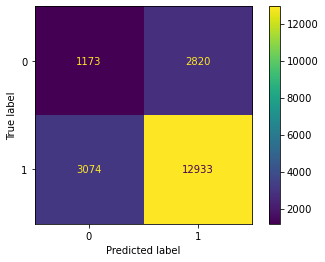

In [118]:
cm = confusion_matrix(test_results,test_pred_result_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [133]:
grid_param_lr = [{'lr__penalty':['l2']}]
grid_param_knn = [{'knn__n_neighbors':[10,15]}]
grid_param_dt = [{'dt__max_depth':[3,5,7]}]
grid_param_rf = [{'rf__max_depth':[5,10]}]

In [134]:
from sklearn.model_selection import GridSearchCV

In [135]:
#GridSearchCV
gridsrc_lr = GridSearchCV(pipe_lr, param_grid=grid_param_lr, scoring='f1', cv=2)
gridsrc_knn = GridSearchCV(pipe_knn, param_grid=grid_param_knn, scoring='f1', cv=2)
gridsrc_dt = GridSearchCV(pipe_dt, param_grid=grid_param_dt, scoring='f1', cv=2)
gridsrc_rf = GridSearchCV(pipe_rf, param_grid=grid_param_rf, scoring='f1', cv=2)

In [136]:
#run thru the models
result_acc = {}
models = []
iter_mdl = [gridsrc_lr,gridsrc_knn,gridsrc_dt,gridsrc_rf]
#iter_mdl = [gridsrc_dt]
mdl_idx = {0:'Log-reg',1:'knn',2:'decision tree',3:'Random forest'}
#mdl_idx = {1:'decision tree'}

for id , model in enumerate(iter_mdl):
    model.fit(X,y)
    print(model.best_params_)
    print(model.best_score_)
    
    models.append(model.best_estimator_)
    result_acc[id] = model.best_score_
    


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\s

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'lr__penalty': 'l2'}
nan


D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "D:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "D:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 

{'knn__n_neighbors': 10}
nan


D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "D:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Anaconda\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "D:\Anaconda

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "D:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "D:\Anaconda\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "D:\Anaconda

{'dt__max_depth': 3}
nan


D:\Anaconda\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "D:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Anaconda\lib\site-packages\sklearn\metrics\_

D:\Anaconda\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "D:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "D:\Anaconda\lib\site-packages\sklearn\metrics\_

{'rf__max_depth': 5}
nan
